# Six Sigma Score Card

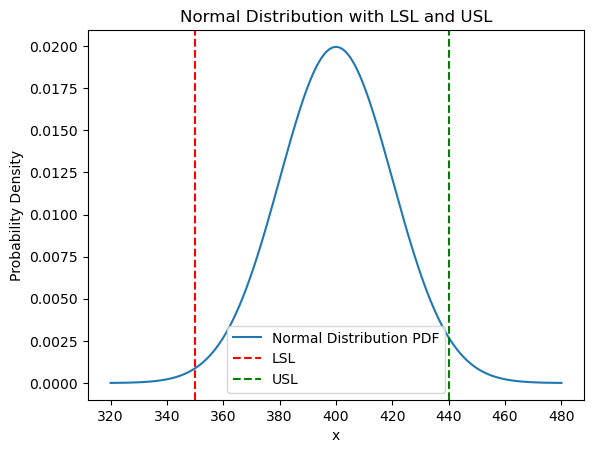

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define a function to plot a normal distribution with specified control limits
def plot_normal_distribution(LSL, USL, mean, sd):
    # Generate a range of x values around the mean, covering +/- 4 standard deviations
    x = np.linspace(mean - 4*sd, mean + 4*sd, 1000)
    
    # Calculate the normal distribution's probability density (y values) for each x
    y = stats.norm.pdf(x, mean, sd)
    
    # Plot the normal distribution curve
    plt.plot(x, y, label='Normal Distribution PDF')
    
    # Add vertical lines for the Lower Specification Limit (LSL) and Upper Specification Limit (USL)
    plt.axvline(x=LSL, color='r', linestyle='--', label='LSL')
    plt.axvline(x=USL, color='g', linestyle='--', label='USL')
    
    # Display the legend to show the curve and control limits
    plt.legend()
    
    # Title and labels for the plot
    plt.title('Normal Distribution with LSL and USL')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    
    # Show the plot
    plt.show()

# Example usage of the function:
# Define the Lower Specification Limit (LSL), Upper Specification Limit (USL),
# the mean of the distribution, and the standard deviation (sd)
LSL = 350
USL = 440
mean = 400
sd = 20

# Call the function with the specified parameters to plot the distribution
plot_normal_distribution(LSL, USL, mean, sd)

In [2]:
# Import the stats module from scipy library
import scipy.stats as stats

# Define a function that calculates the short-term Z (Z_st) values for a process
def z_short(lsl=np.nan, usl=np.nan, mu=np.nan, sigma=np.nan):
    # Define a multiplier for sigma to account for short-term capability
    sigma_lt = 1.3 * sigma
    
    # Initialize the proportion of defectives above the Upper Specification Limit (USL)
    dpo_u = 0
    # If the USL is provided (not NaN), calculate the defective proportion above USL
    if not np.isnan(usl):
        dpo_u = 1 - stats.norm.cdf((usl - mu)/sigma_lt)
    
    # Initialize the proportion of defectives below the Lower Specification Limit (LSL)
    dpo_l = 0
    # If the LSL is provided (not NaN), calculate the defective proportion below LSL
    if not np.isnan(lsl):
        dpo_l = 1 - stats.norm.cdf((mu - lsl)/sigma_lt)
    
    # Calculate the total Defective Parts per Opportunity (DPO) by summing the proportions
    dpo = dpo_u + dpo_l
    
    # Calculate the Z short-term (Z_st) value using the inverse of the normal cumulative distribution function
    z_lt = stats.norm.ppf(1-dpo, loc=0, scale=1)
    
    # Return the DPO and Z_st values
    return dpo, z_lt

# Example usage of the function:
# Calculate and print the Z short-term score for a process with given LSL, USL, mean (mu), and sigma
print(z_short(350, 440, 400, 20))

(0.08920309785010994, 1.3456785847901527)


In [3]:
# Import necessary modules
import numpy as np
import scipy.stats as stats

# Define a function to calculate short-term and long-term Z-scores based on specification limits
def z_short_prototype(lsl=np.nan, usl=np.nan, mu=np.nan, sigma=np.nan):
    # Adjust the standard deviation for long-term capability
    sigma_lt = 1.3 * sigma
    
    # Initialize short-term and long-term defective probabilities above USL to zero
    dpo_u_st = 0
    dpo_u_lt = 0
    
    # Check if the USL is not NaN (i.e., it is provided)
    if not np.isnan(usl):
        # Calculate the probability of defectives above USL for short-term
        dpo_u_st = 1 - stats.norm.cdf((usl - mu) / sigma)
        # Calculate the probability of defectives above USL for long-term, adjusting by 1.5 sigma shift
        dpo_u_lt = 1 - stats.norm.cdf((usl - mu) / sigma_lt - 1.5)
    
    # Initialize short-term and long-term defective probabilities below LSL to zero
    dpo_l_st = 0
    dpo_l_lt = 0
    
    # Check if the LSL is not NaN (i.e., it is provided)
    if not np.isnan(lsl):
        # Calculate the probability of defectives below LSL for short-term
        dpo_l_st = 1 - stats.norm.cdf((mu - lsl) / sigma)
        # Calculate the probability of defectives below LSL for long-term, adjusting by 1.5 sigma shift
        dpo_l_lt = 1 - stats.norm.cdf((mu - lsl) / sigma_lt - 1.5)
    
    # Calculate total defective probability for short-term
    dpo_st = dpo_u_st + dpo_l_st
    # Calculate the Z-score for short-term
    z_st = stats.norm.ppf(1 - dpo_st, loc=0, scale=1)
    
    # Calculate total defective probability for long-term
    dpo_lt = dpo_u_lt + dpo_l_lt
    # Calculate the Z-score for long-term
    z_lt = stats.norm.ppf(1 - dpo_lt, loc=0, scale=1)
    
    # Return the long-term and short-term Z-scores
    return z_lt, z_st

# Example usage of the function:
# Call the function with Lower Specification Limit (LSL), Upper Specification Limit (USL),
# mean (mu), and standard deviation (sigma) to get the Z-scores
z_short_prototype(350, 440, 400, 20)


(-0.9183394792509236, 1.896305990953358)